# Homework 2 - KMeans #

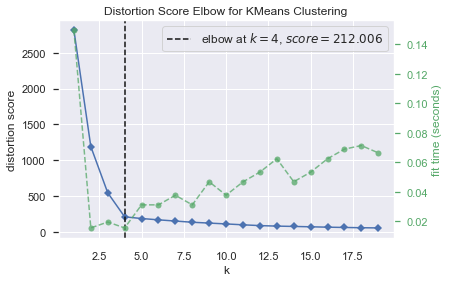

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# Find best K value for the data
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X)
visualizer.show()

From the above chart, we see that k=4 is the best value for k, so we will proceed with performing K means for k=4 on the data

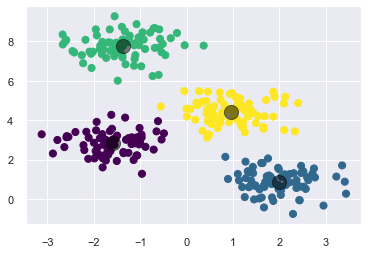

In [22]:
# Do KMeans for k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

We can now create a confusion matrix for our model and determine the accuracy of y_kmeans for the selected k of 4.

Accuracy Score: 0.5


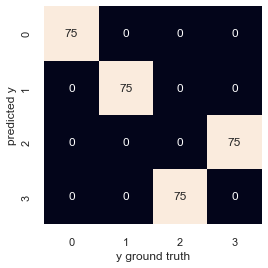

In [20]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
mat = confusion_matrix(y_true, y_kmeans)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('y ground truth')
plt.ylabel('predicted y')

# Accuracy Score
score = accuracy_score(y_true, y_kmeans)
print('Accuracy Score: ' + repr(score))